## Task

Campaign for selling personal loans.
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


Column descriptions 
- ID - Customer ID 
- Age-  Customer's age in completed years 
- Experience - #years of professional experience 
- Income -  Annual income of the customer 
- ZIPCode - Home Address ZIP code. 
- Family - Family size of the customer 
- CCAvg - Avg. spending on credit cards per month
- Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional 
- Mortgage -  Value of house mortgage if any. ($000) 
- Personal Loan - Did this customer accept the personal loan offered in the last campaign? 
- Securities Account -  Does the customer have a securities account with the bank? 
- CD Account - Does the customer have a certificate of deposit (CD) account with the bank? 
- Online - Does the customer use internet banking facilities? 
- CreditCard -  Does the customer use a credit card

     

1. Read the column description and ensure you understand each attribute well 
2. Study the data distribution in each attribute, share your findings. (5 points)
3. Get the target column distribution. Your comments.
4. Split the data into training and test set in the ratio of 70:30 respectively 
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6. Print the confusion matrix for all the above models (5 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

import warnings 
warnings.filterwarnings('ignore')

## Load and review data

In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df = df.set_index('ID')

# Placing the target column 'Personal Loan' on the right of the dataset
df = df[['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard','Personal Loan']]
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [3]:
df.isnull().isnull().sum() # If there are any null values in data set

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

Summary statistics of the dataframe 

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


Identify Correlation in data 

In [5]:
df.corr() # It will show correlation matrix 

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967,-0.007413
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691,0.000107
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954
CD Account,0.008043,0.010353,0.169738,0.019972,0.014110,0.136534,0.013934,0.089311,0.317034,1.000000,0.175880,0.278644,0.316355


However we would like to see correlation in graphical representation so below there is a function for that:

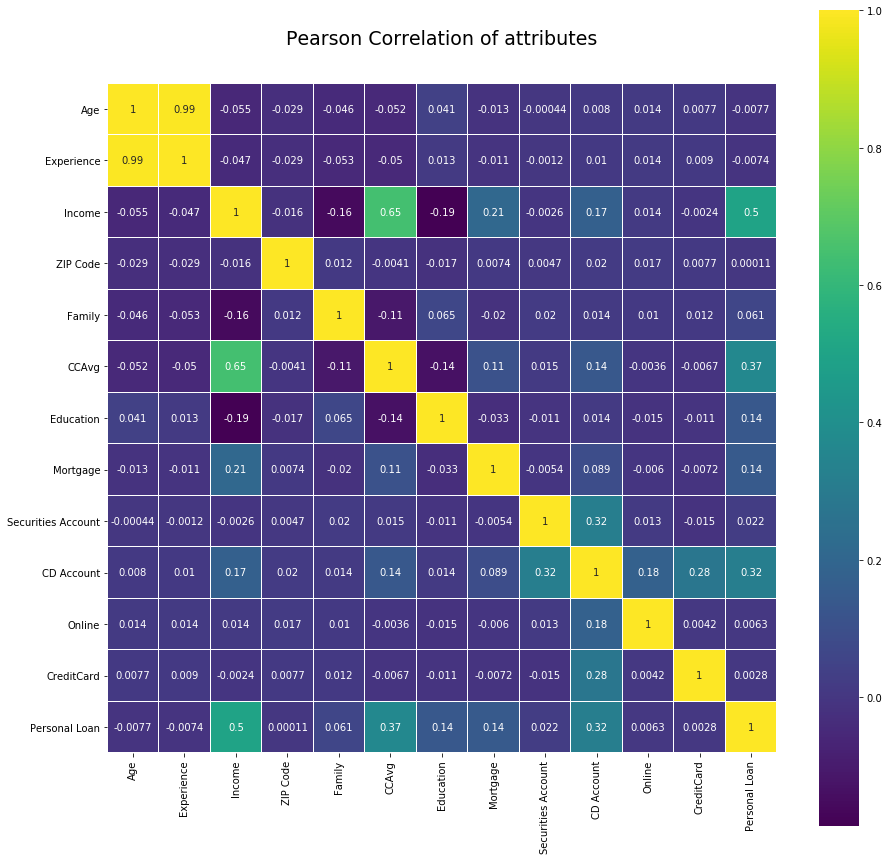

In [6]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Plotting the distributions

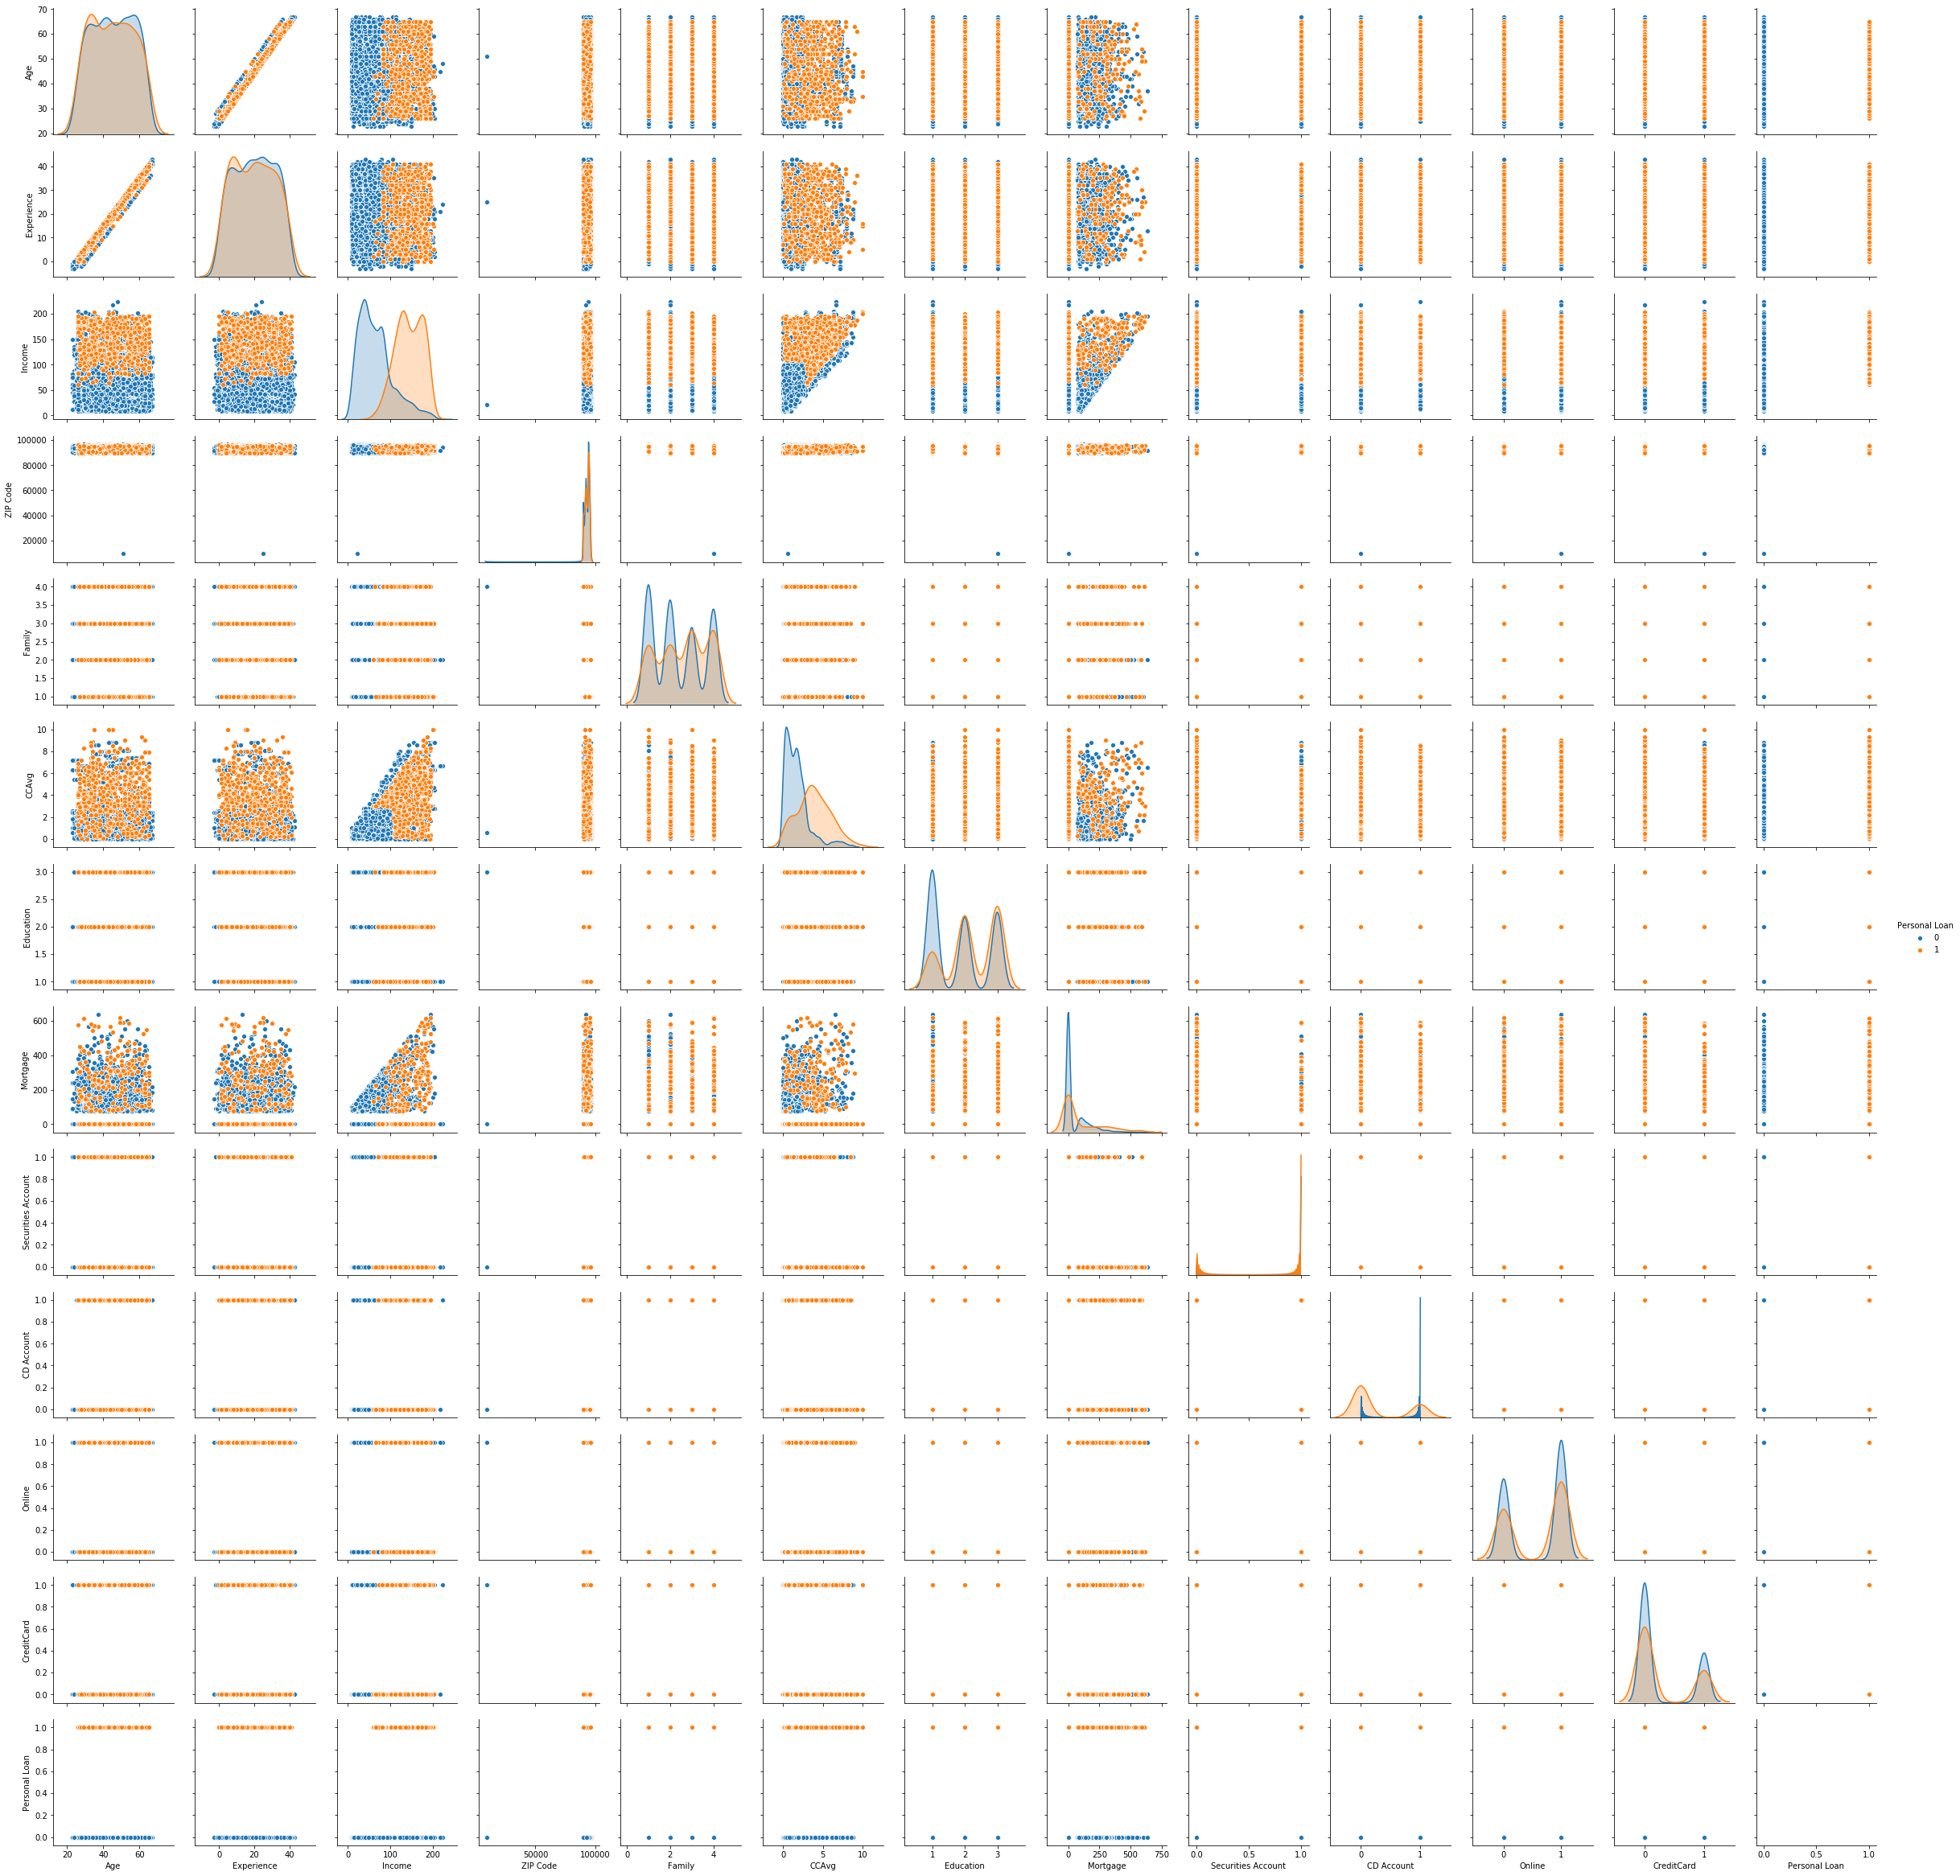

In [7]:
sns.pairplot(df,diag_kind='kde',hue='Personal Loan')

## Study the data distribution in each attribute, share your findings:

1 - 'Age' and 'Experience' are highly correlated (0.99): this is a redundant information and we should remove one of the two features.

2 - The 'Zip Code' is a categorical variable with high cardinality. I have to convert the feature in a string and then remove part of the Zip Code keeping only the first 2 digits to get the area of the postcode: this will decrease the cartdinality of the categorical feature. Once done that, I can create the dummy variables.

3 - 'Income' and 'CCavg' have a distribution skewed to the right. I can apply some transformation to make their distributions more similar to a bell curve. By doing this, I should improve the model performance.

4 - The data are in different scales: I have to normilize the dataset.

In [8]:
# Step 1: 'Age' and 'Experience' correlation
df = df.drop('Age',axis=1)

In [9]:
# Step 2: 'Zip Code'
df['ZIP Code'] = df['ZIP Code'].astype(str).str.slice(0, 2)
df = pd.get_dummies(df, columns=['ZIP Code'], drop_first=True)
df.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan,ZIP Code_91,ZIP Code_92,ZIP Code_93,ZIP Code_94,ZIP Code_95,ZIP Code_96
ID,,,,,,,,,,,,,,,,,
1,1,49,4,1.6,1,0,1,0,0,0,0,1,0,0,0,0,0
2,19,34,3,1.5,1,0,1,0,0,0,0,0,0,0,0,0,0
3,15,11,1,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,9,100,1,2.7,2,0,0,0,0,0,0,0,0,0,1,0,0
5,8,45,4,1.0,2,0,0,0,0,1,0,1,0,0,0,0,0


Text(0.5, 1.0, 'Original Income distribution')

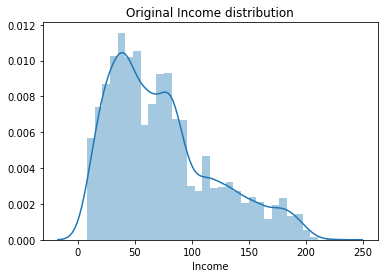

In [10]:
# Step 3: 'Income': fixing the skewness
sns.distplot(df['Income']).set_title('Original Income distribution')

Text(0.5, 1.0, 'New Income distribution')

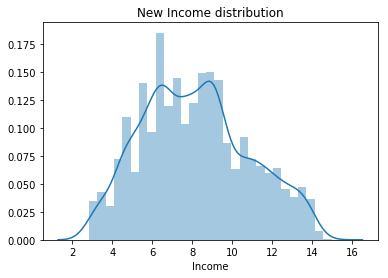

In [11]:
df['Income'] = (df['Income'])**(1/2)
sns.distplot(df['Income']).set_title('New Income distribution')

Text(0.5, 1.0, 'Original CCAvg distribution')

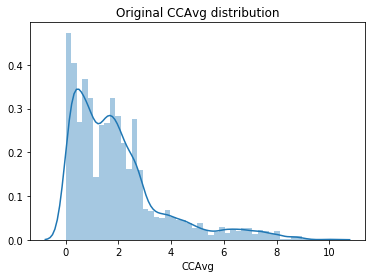

In [12]:
# Step 3: 'CCavg': fixing the skewness
sns.distplot(df['CCAvg']).set_title('Original CCAvg distribution')

Text(0.5, 1.0, 'Original CCAvg distribution')

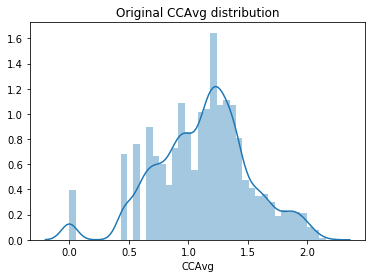

In [13]:
df['CCAvg'] = (df['CCAvg'])**(1/3)
sns.distplot(df['CCAvg']).set_title('Original CCAvg distribution')

In [14]:
# Step 4: Normalize the data. The target column doesn't need to be normalized, but it is already between 0 and 1, 
# then we can apply the normalization to the entire dataset
columns = df.columns.to_list()
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df))
df.columns = columns
df.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan,ZIP Code_91,ZIP Code_92,ZIP Code_93,ZIP Code_94,ZIP Code_95,ZIP Code_96
0,0.086957,0.343673,1.000000,0.542884,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.478261,0.247362,0.666667,0.531329,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.391304,0.040220,0.000000,0.464159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.260870,0.590827,0.000000,0.646330,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.239130,0.319634,1.000000,0.464159,0.5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Calculate personal loans ratio of yes/no from outcome variable

In [15]:
n_true = len(df.loc[df['Personal Loan'] == True])
n_false = len(df.loc[df['Personal Loan'] == False])
print("Number of loans: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of non-loans: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of loans: 480 (9.60%)
Number of non-loans: 4520 (90.40%)


Undestand what fuatures are important:

We can use a classifier with the 'feature_importances_' method. One of the most common is Random Forest. Before doing it, I can use grid search to find out what are the best hyperparameters to use for the classifier, then fitting it to the entire dataset and plot the features importance barchart

In [16]:
# Grid search to get the best hyperparameters
param_grid = [{'n_estimators': [10, 50, 100], 
               'max_features': [3,6,9,12,15],
               'bootstrap': [False, True]}]
classifier = RandomForestClassifier(random_state=1)
f1_scorer = make_scorer(f1_score) # I use F1 to score the models. I'll explain the reason why later
grid_search = GridSearchCV(classifier, param_grid, cv=10,scoring=f1_scorer)
grid_search.fit(df.drop('Personal Loan',axis=1), df['Personal Loan'])
grid_search.best_params_

{'bootstrap': False, 'max_features': 9, 'n_estimators': 100}

Text(0, 0.5, 'Features')

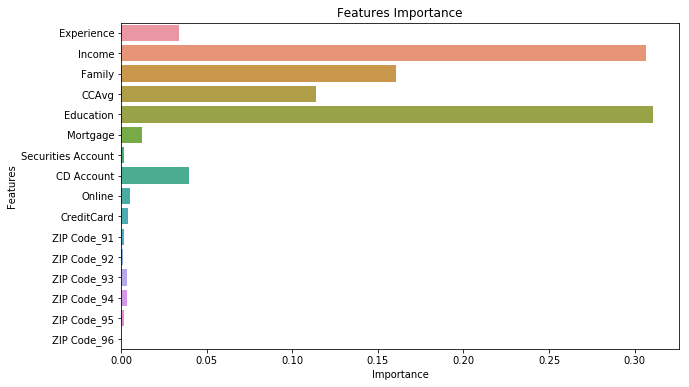

In [17]:
classifier = RandomForestClassifier(bootstrap=grid_search.best_params_.get("bootstrap"), max_features=grid_search.best_params_.get('max_features'), n_estimators=grid_search.best_params_.get('n_estimators'))
classifier.fit(df.drop('Personal Loan',axis=1), df['Personal Loan'])

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Features Importance")

# Bar chart showing the importance of the imput features
features_importance = pd.concat([pd.DataFrame(df.drop('Personal Loan',axis=1).columns),pd.DataFrame(classifier.feature_importances_)], axis=1)
sns.barplot(x=features_importance.iloc[:,1], y=features_importance.iloc[:,0])

# Add label for vertical axis
plt.xlabel("Importance")
plt.ylabel("Features")

Some features are not important at all! By removing them, we can make the model faster (smaller imput space) and hopefully we will get better performances

In [18]:
df = df[['Experience','Income','Family','CCAvg','Education','Mortgage','CD Account','Personal Loan']]
df.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,CD Account,Personal Loan
0,0.086957,0.343673,1.000000,0.542884,0.0,0.0,0.0,0.0
1,0.478261,0.247362,0.666667,0.531329,0.0,0.0,0.0,0.0
2,0.391304,0.040220,0.000000,0.464159,0.0,0.0,0.0,0.0
3,0.260870,0.590827,0.000000,0.646330,0.5,0.0,0.0,0.0
4,0.239130,0.319634,1.000000,0.464159,0.5,0.0,0.0,0.0


## Spliting the data in train and test set
We will use 70% of data for training and 30% for testing.

Let’s also shuffle the training set. This will guarantee that all cross-validation folds will
be similar. Moreover, some learning algorithms are sensitive to the order of the training instances, and they perform
poorly if they get many similar instances in a row. Shuffling the dataset ensures that
this won’t happen

In [19]:
df = df.sample(frac=1)

from sklearn.model_selection import train_test_split

X = df.drop('Personal Loan',axis=1)
Y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

X_train.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,CD Account
2868,0.630435,0.225679,1.000000,0.564622,0.0,0.0,0.0
925,0.456522,0.225679,0.000000,0.310723,1.0,0.0,0.0
772,0.673913,0.825230,0.000000,0.742896,1.0,0.0,1.0
253,0.521739,0.734780,0.000000,0.000000,0.0,0.0,0.0
4569,0.521739,0.343673,0.666667,0.603681,0.5,0.0,0.0


Lets check split of data

In [20]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Now lets check depositors / borrowers ratio in split data 

In [21]:
print("Original borrowers Values     {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 1]), (len(df.loc[df['Personal Loan'] == 1])/len(df.index)) * 100))
print("Original depositors Values    {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 0]), (len(df.loc[df['Personal Loan'] == 0])/len(df.index)) * 100))
print("")
print("Training borrowers Values     {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training depositors Values    {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test borrowers Values         {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test depositors Values        {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original borrowers Values     480 (9.60%)
Original depositors Values    4520 (90.40%)

Training borrowers Values     316 (9.03%)
Training depositors Values    3184 (90.97%)

Test borrowers Values         164 (10.93%)
Test depositors Values        1336 (89.07%)



## Use different classification models to predict the likelihood of a liability customer buying personal loans

We are dealing with a supervised classification unbalanced binary problem: accuracy is not the best parameter to evaluate the models perfromances because it is unbalanced.

What metric should we use between accuracy, precision, recall and F1 score? Since we are interested to "increase the success ratio while at the same time reduce the cost of the campaign", we can't improve only precision or only recall. The best metric to find to look at to find the right balance is the F1 score (higher is better).

## Model Building

The optimal number of neighbors is 1


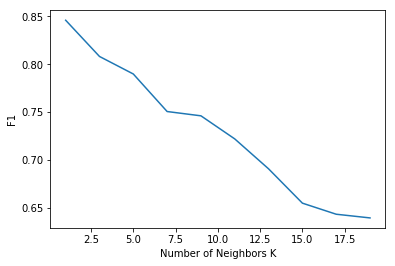

In [22]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
f1_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring="f1").mean()
    f1_scores.append(scores)

# changing to misclassification error
F1 = [x for x in f1_scores]

# determining best k
optimal_k = neighbors[F1.index(max(F1))]
print("The optimal number of neighbors is %d" % optimal_k)

import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, F1)
plt.xlabel('Number of Neighbors K')
plt.ylabel('F1')
plt.show()

Grid search to get the best hyperparameters

In [23]:
# LOGISTI REGRESSION
param_grid = [{'solver': ["newton-cg", "lbfgs", "liblinear","sag","saga"]}]
f1_scorer = make_scorer(f1_score)
grid_search_logistic = GridSearchCV(LogisticRegression(random_state=1), param_grid, cv=10,scoring=f1_scorer)
grid_search_logistic.fit(X_train, y_train)
print('Logistic hyperparameters = ',grid_search_logistic.best_params_)

Logistic hyperparameters =  {'solver': 'newton-cg'}


In [24]:
# SVM
param_grid = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
               'C': [0.1, 1, 10],
               'gamma': [0.1, 1, 10]}]
f1_scorer = make_scorer(f1_score)
grid_search_svm = GridSearchCV(SVC(random_state=1), param_grid, cv=10, scoring=f1_scorer)
grid_search_svm.fit(X_train, y_train)
print('SVM hyperparameters = ',grid_search_svm.best_params_)

SVM hyperparameters =  {'C': 10, 'gamma': 1, 'kernel': 'poly'}


In [25]:
# RANDOM FOREST
param_grid = [{'n_estimators': [10, 50, 100], 
               'max_features': [2,4,6],
               'max_leaf_nodes': [5,10,50],
               'bootstrap': [False, True]}]
f1_scorer = make_scorer(f1_score)
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=10, scoring=f1_scorer)
grid_search_rf.fit(X_train, y_train)
print('Random Forest hyperparameters = ',grid_search_rf.best_params_)

Random Forest hyperparameters =  {'bootstrap': True, 'max_features': 4, 'max_leaf_nodes': 50, 'n_estimators': 50}


In [45]:
# Defining the models with the best hyperparameters
naive_bayes = GaussianNB()
knn = KNeighborsClassifier(n_neighbors = 1)
logistic = LogisticRegression(solver=grid_search_logistic.best_params_.get("solver"),
                              random_state=1)
svm = SVC(kernel=grid_search_svm.best_params_.get("kernel"),
          C=grid_search_svm.best_params_.get("C"),
          gamma=grid_search_svm.best_params_.get("gamma"),
          random_state=1)
rf = RandomForestClassifier(bootstrap=grid_search_rf.best_params_.get("bootstrap"),
                            max_features=grid_search_rf.best_params_.get("max_features"),
                            max_leaf_nodes=grid_search_rf.best_params_.get("max_leaf_nodes"),
                            n_estimators=grid_search_rf.best_params_.get("n_estimators"),
                            random_state=1)

# Defining a list with all the models
models_list = [naive_bayes,knn,logistic,svm,rf]

The best option to evaluate the model performance is the Scikit-Learn’s cross-validation feature. 

The following code defines functions to scoring the model using K-fold cross-validation on the training set to calculate different scores (accuracy, precision, recall and F1).

Finaly, it defines the function to make the confusion matrix using the test set

In [46]:
def score_model(model):
    # Fit the model on train
    model = models_list[i]
    model.fit(X_train, y_train)
    #predict on test
    y_predict = model.predict(X_test)
    df_table = confusion_matrix(y_test,y_predict)
    a = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy").mean()
    p = cross_val_score(model, X_train, y_train, cv=10, scoring="precision").mean()
    r = cross_val_score(model, X_train, y_train, cv=10, scoring="recall").mean()
    f = cross_val_score(model, X_train, y_train, cv=10, scoring="f1").mean()
    TP = df_table[1,1]
    FN = df_table[0,1]
    return [a,p,r,f,y_test,y_predict,TP,FN]

def draw_cm(actual,predicted):
    cm = metrics.confusion_matrix(actual,predicted,[1,0])
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Loan", "No Loan"] , yticklabels = ["Loan", "No Loan"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## Print the confusion matrix for all the above models

LEGEND: 

Model 1 = Naive Bayes 
Model 2 = KNN 
Model 3 = Logistic Regression 
Model 4 = SVM 
Model 5 = Random Forest 


Model 1 - Accuracy = 0.91 
          Precision = 0.55 
          Recall = 0.54 
          F1 = 0.54


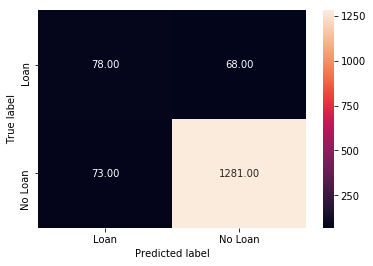


Model 2 - Accuracy = 0.97 
          Precision = 0.92 
          Recall = 0.78 
          F1 = 0.84


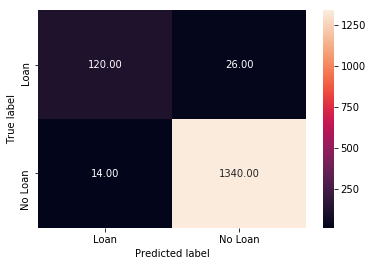


Model 3 - Accuracy = 0.95 
          Precision = 0.89 
          Recall = 0.56 
          F1 = 0.68


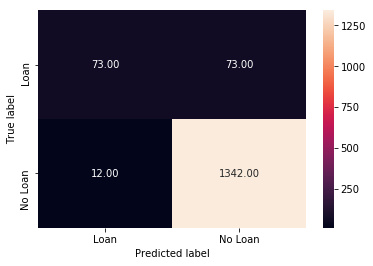


Model 4 - Accuracy = 0.98 
          Precision = 0.96 
          Recall = 0.87 
          F1 = 0.91


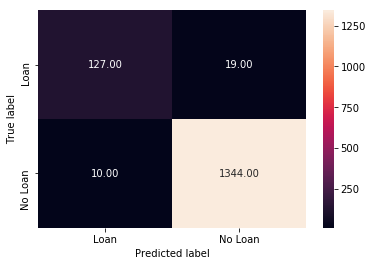


Model 5 - Accuracy = 0.99 
          Precision = 0.97 
          Recall = 0.91 
          F1 = 0.94


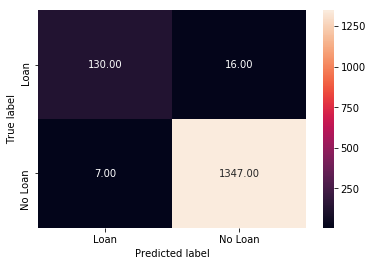

In [47]:
print('LEGEND: \n\nModel 1 = Naive Bayes \nModel 2 = KNN \nModel 3 = Logistic Regression \nModel 4 = SVM \nModel 5 = Random Forest \n')
models = []
score_F1 = []
TPs = []
FNs = []
for i in range(0,len(models_list)):
    a = round(score_model(models_list[i])[0],2)
    p = round(score_model(models_list[i])[1],2)
    r = round(score_model(models_list[i])[2],2)
    f = round(score_model(models_list[i])[3],2)
    actual = score_model(models_list[i])[4]
    predicted = score_model(models_list[i])[5]
    TP = score_model(models_list[i])[6]
    FN = score_model(models_list[i])[7]
    print('\nModel %d - Accuracy = %0.2f \n          Precision = %0.2f \n          Recall = %0.2f \n          F1 = %0.2f'% (i+1, a, p, r,f))
    draw_cm(actual,predicted)
    models.append(i+1)
    score_F1.append(f)
    TPs.append(TP)
    FNs.append(FN)

The best model seems to be model 5 - the Random Forest. There might space of improvement by tuning a bit more the hyperparameters. 

Let's also plt the ROC curve

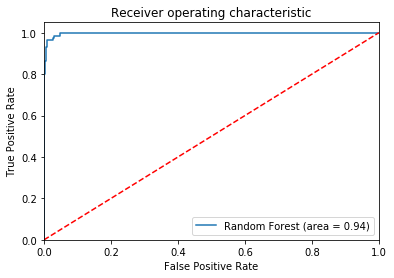

In [48]:
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

If I want to predict the likelihood of a liability customer buying personal loan:

PS: Please note that not all the classifiers have the predict_proba method

In [80]:
predicted_prob = pd.concat([y_test.reset_index(), pd.DataFrame(rf.predict_proba(X_test))[1]],axis=1)
predicted_prob.columns = ['ID','True Personal Loan','Predicted likelihood to have a Personal Loan']
predicted_prob.head(20)

,ID,True Personal Loan,Predicted likelihood to have a Personal Loan
0,2490,1.0,0.999463
1,4726,0.0,0.000502
2,298,0.0,0.106858
3,894,0.0,0.000482
4,10,0.0,0.023791
5,3005,1.0,0.999428
6,4931,0.0,0.000596
7,483,0.0,0.000521
8,3452,0.0,0.000559
9,4479,0.0,0.002076


## Space for improvement

1 - Try more sofisticated method (ie. AdaBoost, XGBoost or ANN. ANN is unlikely to perform well, since the dataset is relatevely small)

2 - Using stacking techniques with soft votings (we can combine all the classifier having the predict_proba method)

3 - Working on features engineering: we removed all the features that the Random Forest classified as 'not-important'. We need to check if we can have performance improvement by adding back one or some of them. We can also try to combine the features.